In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
from sklearn.linear_model import LinearRegression
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
housing = pd.read_csv("housing.csv")

In [3]:
housing.tail()
#medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
housing.shape

(20640, 10)

In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.info()
#there are missing values in total_bedrooms

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

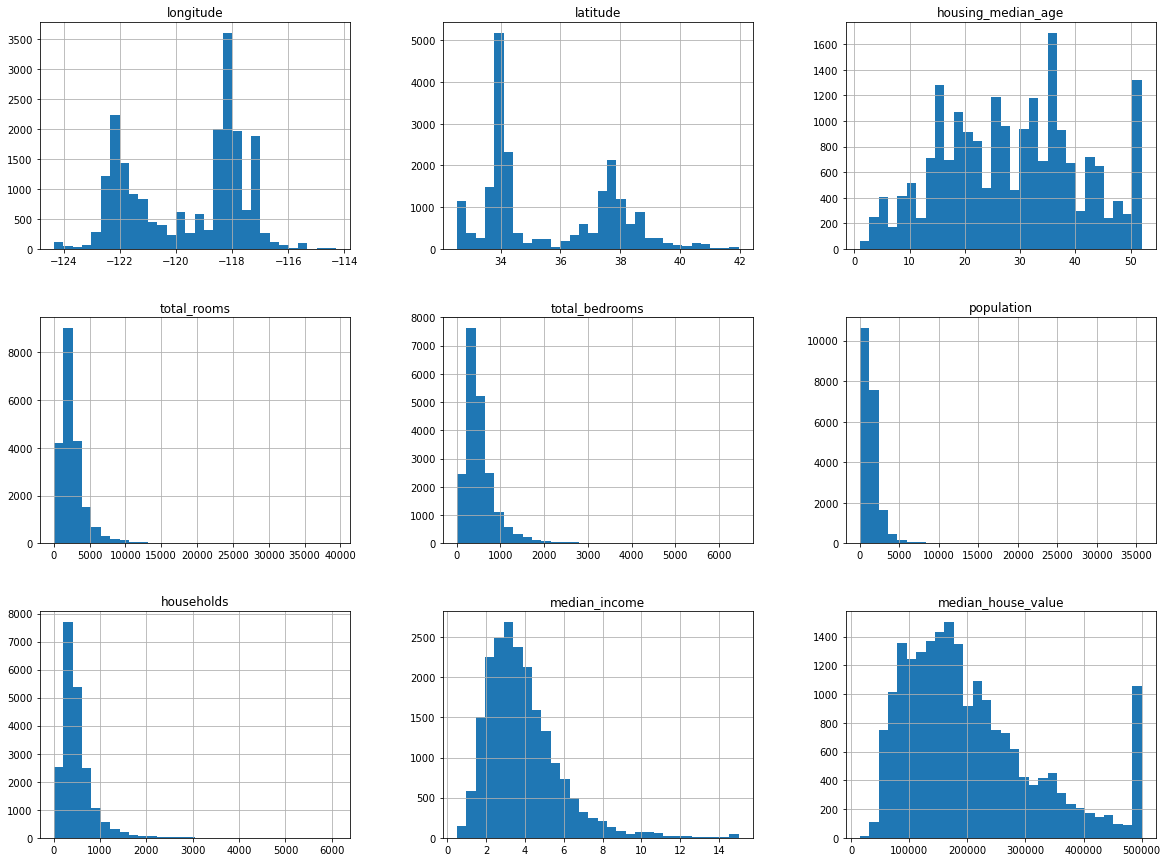

In [8]:
housing.hist(bins=30, figsize=(20,15))

In [9]:
#there are some outliers in median house value, we will remove those later in feature engineering

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

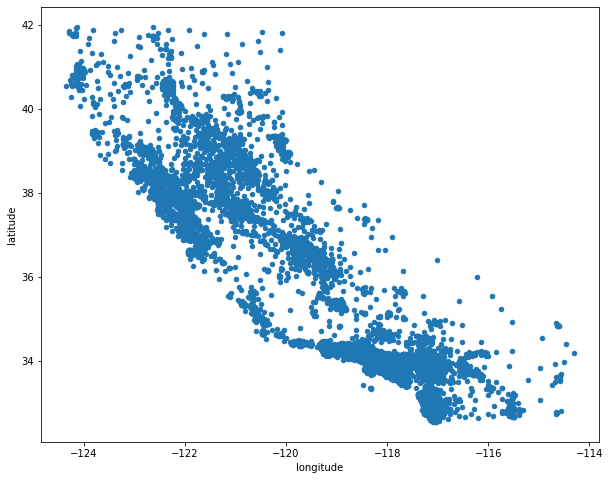

In [10]:
housing.plot(kind='scatter', x='longitude',y='latitude',figsize=(10,8))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

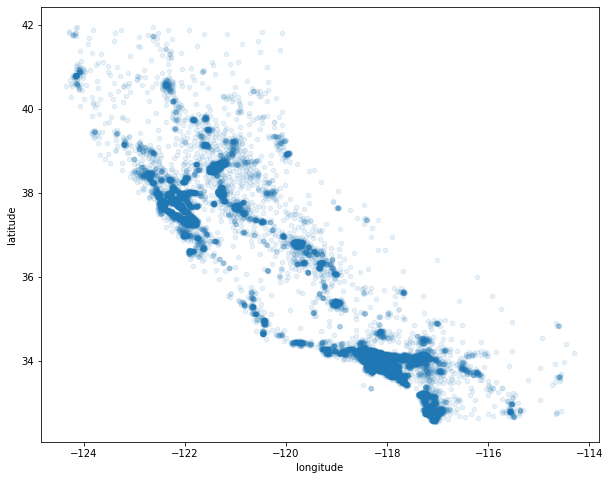

In [11]:
housing.plot(kind='scatter', x='longitude',y='latitude',figsize=(10,8),alpha=0.1)
#using alpha shows high density area

<Figure size 720x504 with 0 Axes>

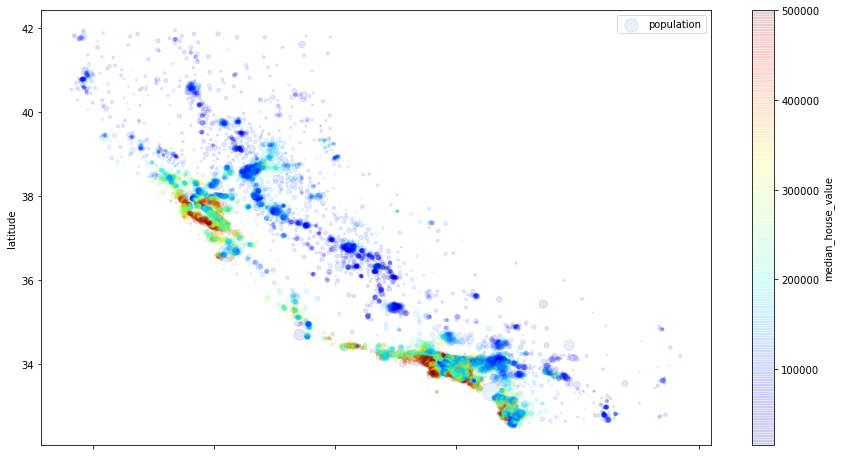

In [12]:
plt.figure(figsize=(10,7))
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1,
        s=housing["population"]/100, label="population", figsize=(15,8),
        c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True,
    )
plt.legend()

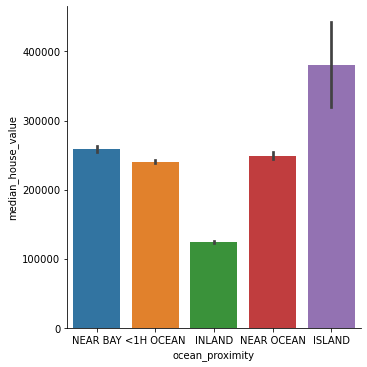

In [13]:
#plotting catagorical data with median house value
sns.catplot(x="ocean_proximity", y="median_house_value",kind="bar", data=housing)
#inland houses has lower median house value

In [14]:
corr_matrix = housing.corr()

In [15]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<AxesSubplot:>

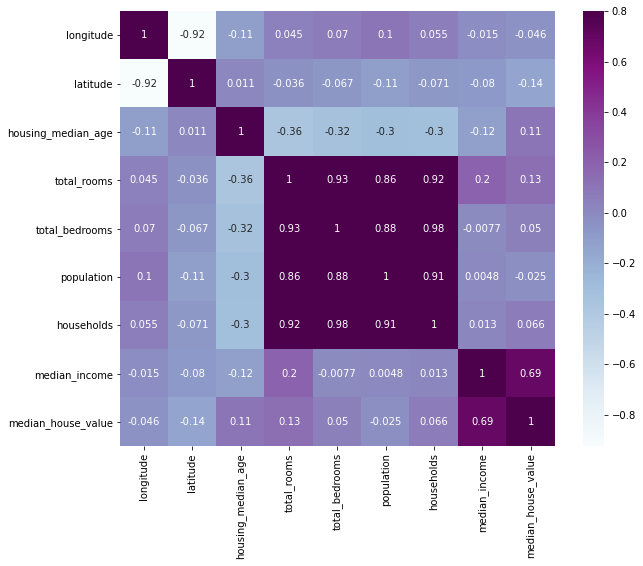

In [16]:
#visualizing using seaborn heatmap
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

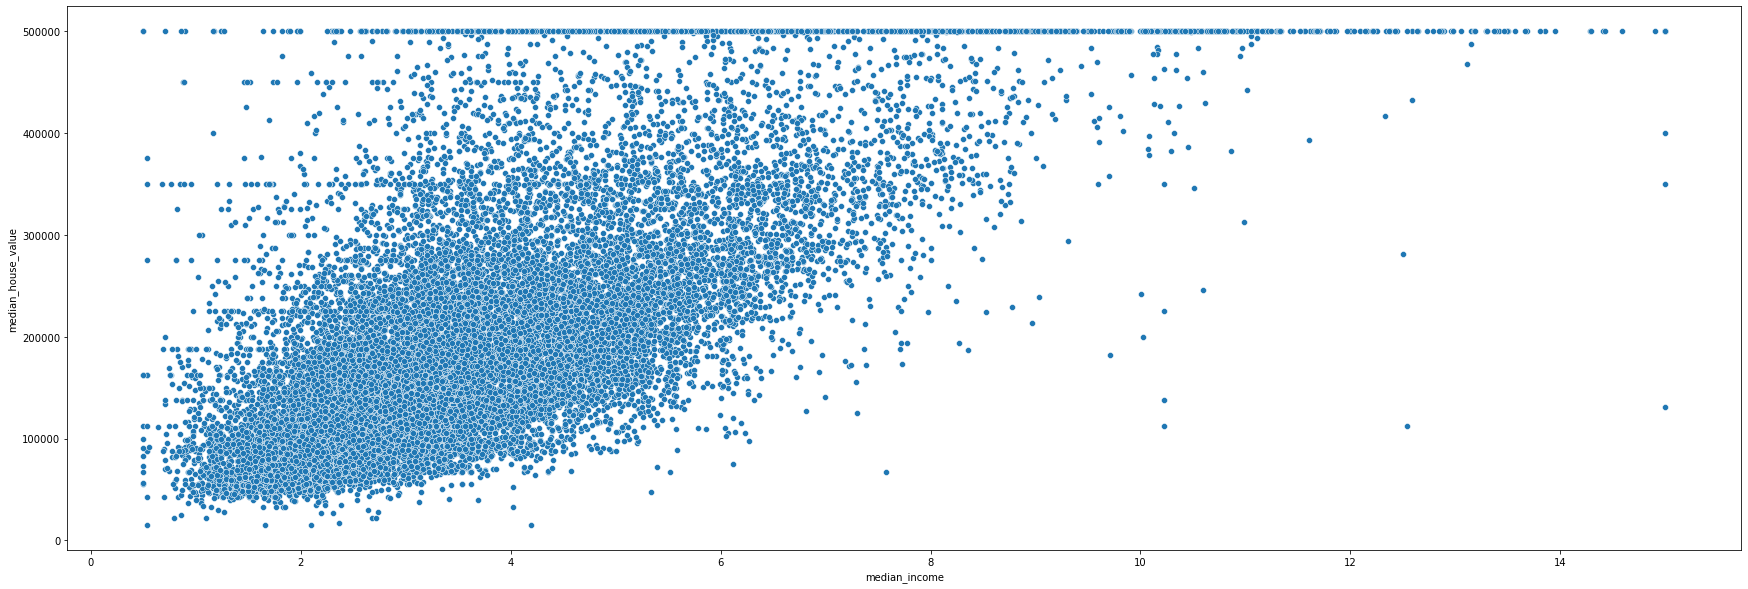

In [17]:
# Plot median_house_value against median_income since they have relatively strong correlation between them
fig=plt.figure(figsize=(30,10))
sns.scatterplot(x="median_income", y = "median_house_value", data= housing)

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

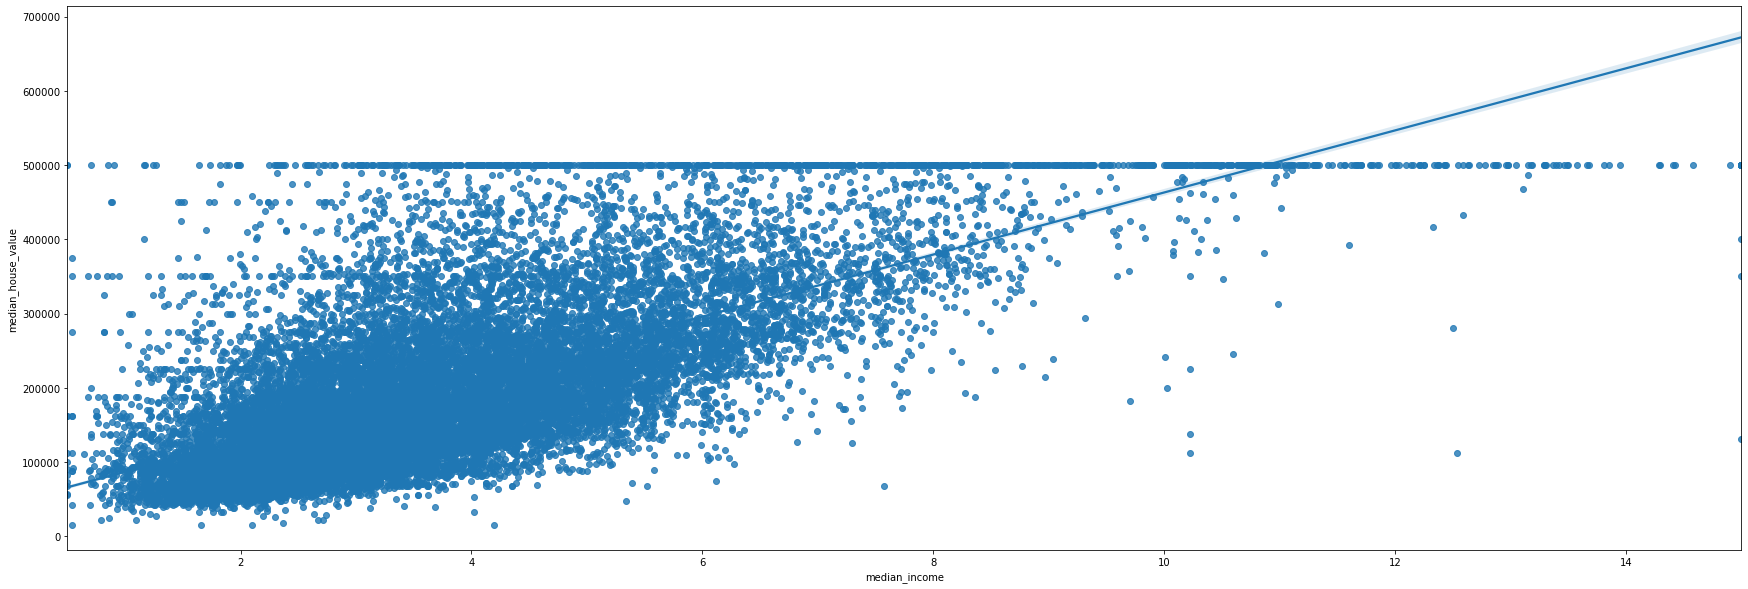

In [18]:
fig=plt.figure(figsize=(30,10))
sns.regplot(x="median_income",y="median_house_value", data=housing )

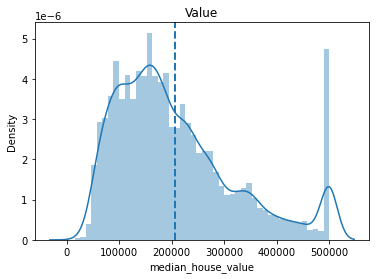

In [19]:
sns.distplot(housing['median_house_value'])
plt.axvline(x=housing['median_house_value'].mean(), linestyle='--', linewidth=2)
plt.title('Value');

In [20]:
print('skew: {}'.format(housing['median_house_value'].skew()))

skew: 0.9777632739098341


In [21]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [22]:
housing_full = housing.dropna(subset=['total_bedrooms'])

In [23]:
housing_full.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [24]:
#changins catagorical data to numeric using dummies
dummies = pd.get_dummies(housing_full.ocean_proximity)
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [25]:
#concating dummies to original data set
housing_num = pd.concat([housing_full, dummies], axis='columns')

In [26]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [27]:
#dropping ocean_proximity with catagorical variable so we can run OLS regression and dropping island column since there are 
# only 5 observation
housing_final = housing_num.drop(['ocean_proximity','ISLAND'], axis='columns')

In [28]:
housing_final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


In [29]:
#outliner removal from median_house_value
  
count = len([i for i in housing_final["median_house_value"] if i == 500001.000000])
print(count)

#965 houses with same median house value doesn't seems right

958


In [30]:
# housing_final["median_house_value"]= [i for i in housing["median_house_value"] if i < 500001.000000]
        
housing_end = housing_final[housing_final.median_house_value < 500000]

In [31]:
count_final = len([i for i in housing_end["median_house_value"] if i == 500001.000000])
print(count_final)

0


<AxesSubplot:>

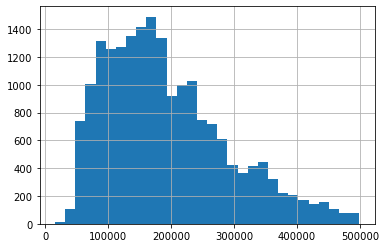

In [32]:
housing_end["median_house_value"] .hist(bins=30)

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

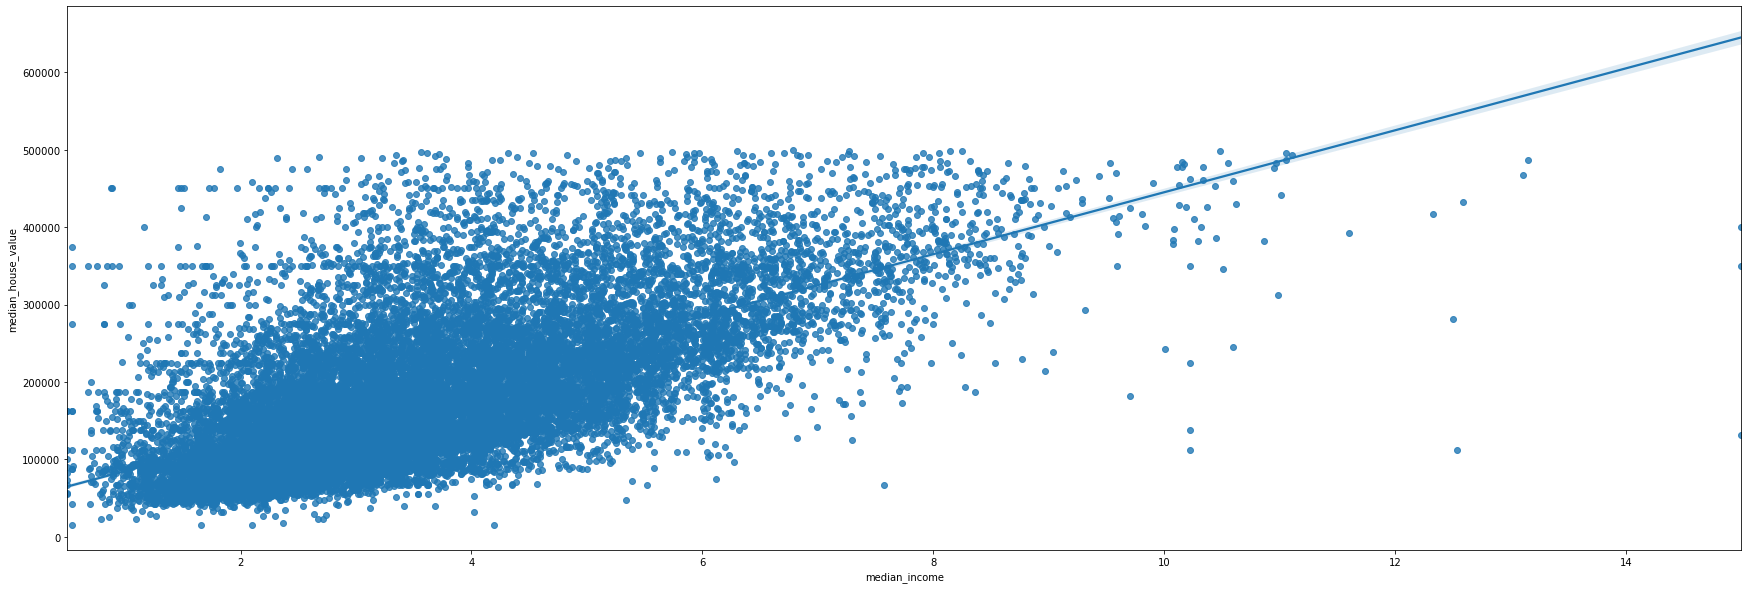

In [33]:
fig=plt.figure(figsize=(30,10))
sns.regplot(x="median_income",y="median_house_value", data=housing_end )

In [34]:
#Having 1086 values of median age of exactly 52 doesnt sit right, lets remove value with median age 52
count_age = len([i for i in housing_end["housing_median_age"] if i == 52 ])
print(count_age)

1086


In [35]:
housing_end = housing_end[housing_final.housing_median_age != 52]

<ipython-input-35-091f7a9b38f5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  housing_end = housing_end[housing_final.housing_median_age != 52]


In [36]:
count_age = len([i for i in housing_end["housing_median_age"] if i == 52 ])
print(count_age)

0


In [37]:
count_age = len([i for i in housing_end["population"] if i < 1000 ])
print(count_age)

6856


In [38]:
housing_end.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
count,18362.000000,18362.000000,18362.000000,18362.000000,18362.000000,18362.000000,18362.000000,18362.000000,18362.000000,18362.000000,18362.000000,18362.000000,18362.000000
mean,-119.485335,35.594801,26.966834,2669.952565,547.969938,1470.184729,508.592256,3.693629,189276.059089,0.447990,0.342501,0.084305,0.125095
std,1.980815,2.148416,11.435392,2228.421462,429.491792,1164.120691,389.607263,1.569828,95340.724155,0.497301,0.474559,0.277852,0.330836
min,-124.300000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.550000,33.920000,17.000000,1458.000000,300.000000,811.000000,284.000000,2.537000,115300.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.450000,34.240000,27.000000,2142.000000,442.000000,1203.000000,415.500000,3.469950,171100.000000,0.000000,0.000000,0.000000,0.000000
75%,-117.970000,37.670000,36.000000,3182.000000,659.000000,1779.000000,614.000000,4.616700,242975.000000,1.000000,1.000000,0.000000,0.000000
max,-114.310000,41.950000,51.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,499100.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
housing_end["rooms_per_household"] = housing_end["total_rooms"]/housing_end["households"]
housing_end["bedrooms_per_room"] = housing_end["total_bedrooms"]/housing_end["total_rooms"]
housing_end["population_per_household"]=housing_end["population"]/housing_end["households"]


In [40]:
corr_end = housing_end.corr()
corr_end["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.664367
<1H OCEAN                   0.318499
total_rooms                 0.152861
NEAR OCEAN                  0.145916
rooms_per_household         0.114573
NEAR BAY                    0.111424
households                  0.099419
total_bedrooms              0.079879
population                  0.021622
housing_median_age          0.014647
population_per_household   -0.020127
longitude                  -0.022069
latitude                   -0.172196
bedrooms_per_room          -0.232835
INLAND                     -0.501157
Name: median_house_value, dtype: float64

# Pre-processing

In [41]:
#Normalizing dataset
housing_end["median_house_value_log"] =np.log(housing_end["median_house_value"])
housing_end["median_income_log"] =np.log(housing_end["median_income"])
housing_end["total_bedrooms_log"] =np.log(housing_end["total_bedrooms"])
housing_end["population_log"] =np.log(housing_end["population"])
housing_end["housing_median_age_log"] =np.log(housing_end["housing_median_age"])
housing_end["population_per_household_log"] =np.log(housing_end["population_per_household"])
housing_end["bedrooms_per_room_log"] =np.log(housing_end["bedrooms_per_room"])

In [42]:
X = housing_end[['median_income']]

In [43]:
y = housing_end[['median_house_value']]

In [44]:
y.head()

,median_house_value
0,452600.0
1,358500.0
8,226700.0
15,140000.0
18,158700.0


In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state= 123)

In [47]:
scaler = StandardScaler().fit(X_train,X_test)

In [48]:
print(scaler)

StandardScaler()


In [50]:
scaler.transform(X_train)

array([[-0.462068  ],
       [-0.33988782],
       [-1.15993053],
       ...,
       [-0.52191395],
       [-0.51196089],
       [-0.64032983]])

In [51]:
scaler.transform(X_test)

array([[-3.67705344e-01],
       [-8.17762237e-01],
       [ 3.74073859e+00],
       ...,
       [-1.75781586e+00],
       [-8.02960252e-01],
       [-3.52548288e-03]])

In [52]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(13771, 1) (13771, 1)
(4591, 1) (4591, 1)


# Modeling

In [53]:
rModel = linear_model.LinearRegression(normalize = True)

In [54]:
# We now want to train the model on our test data.
rModel.fit(X_train, y_train)

LinearRegression(normalize=True)

In [55]:
# Evaluate the model  
print(rModel.score(X_train, y_train))

0.4402997108625598


In [56]:
# Use the model to make predictions about our test data
y_pred = rModel.predict(X_test)

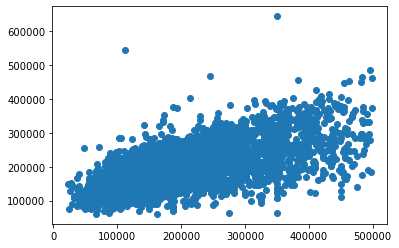

In [57]:
# Let's plot the predictions against the actual result. Use scatter()
plt.scatter(y_test,y_pred)

In [58]:
X = housing_end[['median_income']]
X = sm.add_constant(X)

In [59]:
y = housing_end[['median_house_value']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state= 123)

In [60]:
# Create the model
rModel2 = sm.OLS(y_train, X_train)
# Fit the model with fit() 
rModel2_results = rModel2.fit()

In [61]:
rModel2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                 1.083e+04
Date:                Mon, 04 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:53:24   Log-Likelihood:            -1.7336e+05
No. Observations:               13771   AIC:                         3.467e+05
Df Residuals:                   13769   BIC:                         3.467e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           4.08e+04   1547.614     26.363      0.000    3.78e+04    4.38e+04
median_income  4.015e+04    385.760    104.075      0.000    3.94e+04    4.09e+04
==============================================================================
Omnibus:                     2328.150   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4381.302
Skew:                           1.055   Prob(JB):                         0.00
Kurtosis:                       4.784   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# Let's use our new model to make predictions of the dependent variable y. Use predict(), and plug in X_test as the parameter
y_pred = rModel2_results.predict(X_test)

Text(0, 0.5, 'predictions')

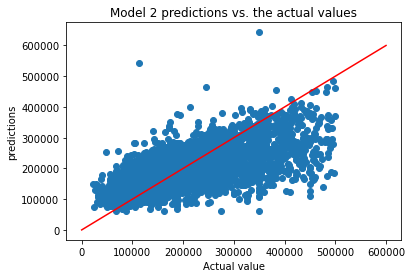

In [63]:
# Plot the predictions
# Build a scatterplot
plt.scatter(y_test, y_pred)

# Add a line for perfect correlation. Can you see what this line is doing? Use plot()
plt.plot([x for x in range(0,600000)],[x for x in range(0,600000)], color='red')

# Label it nicely
plt.title("Model 2 predictions vs. the actual values")
plt.xlabel("Actual value")
plt.ylabel("predictions")

#Making a Linear Regression model: our third model: multiple linear regression

In [64]:
X = housing_end.drop(["median_house_value"],axis=1)
X = sm.add_constant(X)
y = housing_end[["median_house_value"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [65]:
# We can use almost identical code to create the third model, because it is the same algorithm, just different inputs
# Create the model
rModel3 = sm.OLS(y_train, X_train)
# Fit the model
rModel3_results = rModel3.fit()
# Evaluate the model
rModel3_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     8826.
Date:                Mon, 04 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:53:27   Log-Likelihood:            -1.5865e+05
No. Observations:               13771   AIC:                         3.173e+05
Df Residuals:                   13748   BIC:                         3.175e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -1.713e+06   4.77e+04    -35.882      0.000   -1.81e+06   -1.62e+06
longitude                      545.2976    453.676      1.202      0.229    -343.970    1434.565
latitude                      1306.4119    448.817      2.911      0.004     426.670    2186.154
housing_median_age              99.8932     56.154      1.779      0.075     -10.177     209.963
total_rooms                      1.2978      0.450      2.885      0.004       0.416       2.180
total_bedrooms                 -16.6677      4.108     -4.057      0.000     -24.720      -8.615
population                      -2.2808      0.666     -3.423      0.001      -3.587      -0.975
households                      17.7534      4.491      3.953      0.000       8.951      26.556
median_income                 3.073e+04    534.662     57.483      0.000    2.97e+04    3.18e+04
<1H OCEAN                    -1.207e+04   2.44e+04     -0.494      0.621   -5.99e+04    3.58e+04
INLAND                        -214.7871   2.44e+04     -0.009      0.993   -4.81e+04    4.77e+04
NEAR BAY                     -1.366e+04   2.44e+04     -0.559      0.576   -6.16e+04    3.42e+04
NEAR OCEAN                   -5296.1791   2.44e+04     -0.217      0.828   -5.32e+04    4.26e+04
rooms_per_household          -1154.8904    186.611     -6.189      0.000   -1520.673    -789.108
bedrooms_per_room              -2.4e+05   1.99e+04    -12.056      0.000   -2.79e+05   -2.01e+05
population_per_household        -6.8952     19.014     -0.363      0.717     -44.166      30.375
median_house_value_log        1.721e+05    717.264    239.925      0.000    1.71e+05    1.73e+05
median_income_log            -9.475e+04   1779.996    -53.231      0.000   -9.82e+04   -9.13e+04
total_bedrooms_log            1.802e+04   2943.339      6.122      0.000    1.22e+04    2.38e+04
population_log               -1.792e+04   2952.115     -6.069      0.000   -2.37e+04   -1.21e+04
housing_median_age_log        6197.4567   1159.514      5.345      0.000    3924.652    8470.262
population_per_household_log  7570.7049   3279.745      2.308      0.021    1141.957     1.4e+04
bedrooms_per_room_log         6.011e+04   5702.835     10.541      0.000    4.89e+04    7.13e+04
==============================================================================
Omnibus:                     4327.104   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18169.664
Skew:                           1.500   Prob(JB):                         0.00
Kurtosis:                       7.761   Cond. No.                     1.16e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctl

The R-Squared score shows a big improvement - our first model predicted only around 44% of the variation, but now we are predicting 93.4% which is a great.

Text(0, 0.5, 'Predicted')

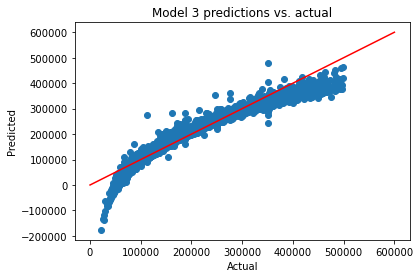

In [66]:
# Use our new model to make predictions
y_pred = rModel3_results.predict(X_test)

# Plot the predictions
# Build a scatterplot
plt.scatter(y_test, y_pred)

# Add a line for perfect correlation
plt.plot([x for x in range(0,600000)],[x for x in range(0,600000)], color='red')

# Label it nicely
plt.title("Model 3 predictions vs. actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [67]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha =0.5, normalize = True).fit(X_train,y_train)
ridge.score(X_test,y_test)


0.8291832583119897

In [68]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha =0.5, normalize = True).fit(X_train,y_train)

In [69]:
y_pred = lasso.predict(X_test)

In [70]:
y_pred

array([127559.72020934,  11662.27234922, 407444.23666902, ...,
        85815.36127977, 146522.85936567, 314066.97211795])

In [71]:
lasso.score(X_train, y_train)

0.9336271360382804